In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the unified data
df = pd.read_parquet("ForParticipants/csv_data_extracted/harmonized_trade_data.parquet")

# Add year and month columns for filtering
df["year"] = df["month"].dt.year
df["month_str"] = df["month"].dt.to_period("M").astype(str)

# Quick peek
df.head()

,origin,destination,hs6,hs4,trade_flow,month,value,year,month_str
0,CHN,\N,030359,0303,Exports,2023-01-01,45000,2023,2023-01
1,CHN,\N,070310,0703,Exports,2023-01-01,2200,2023,2023-01
2,CHN,\N,070320,0703,Exports,2023-01-01,600,2023,2023-01
3,CHN,\N,190230,1902,Exports,2023-01-01,28917,2023,2023-01
4,CHN,\N,200870,2008,Exports,2023-01-01,11520,2023,2023-01


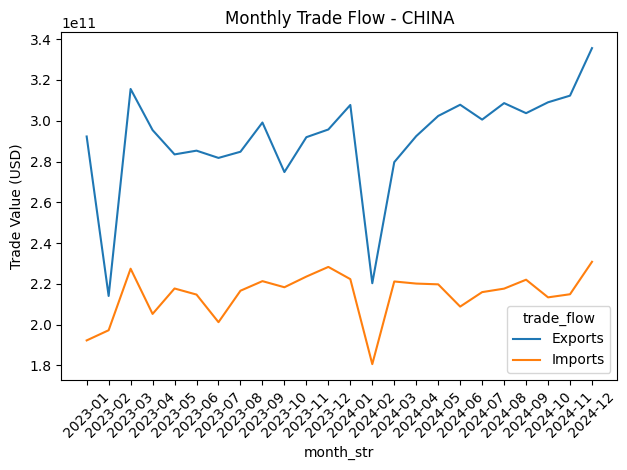

In [3]:
df_chn = df[df["origin"] == "CHN"]

monthly_chn = df_chn.groupby(["year", "month_str", "trade_flow"])["value"].sum().reset_index()

sns.lineplot(data=monthly_chn, x="month_str", y="value", hue="trade_flow")
plt.xticks(rotation=45)
plt.title("Monthly Trade Flow - CHINA")
plt.ylabel("Trade Value (USD)")
plt.tight_layout()
plt.show()

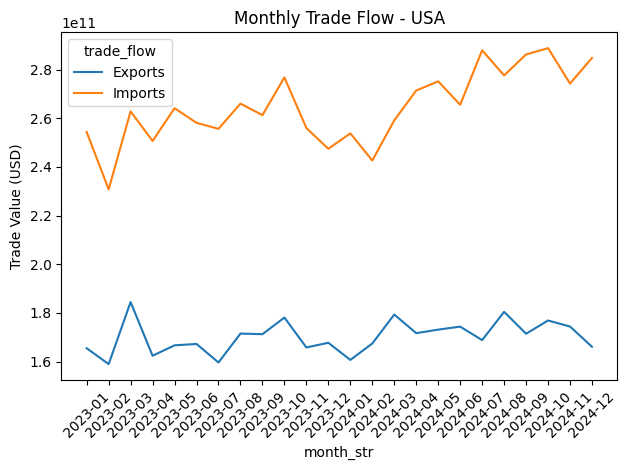

In [4]:
df_usa = df[df["origin"] == "USA"]

monthly_usa = df_usa.groupby(["year", "month_str", "trade_flow"])["value"].sum().reset_index()

sns.lineplot(data=monthly_usa, x="month_str", y="value", hue="trade_flow")
plt.xticks(rotation=45)
plt.title("Monthly Trade Flow - USA")
plt.ylabel("Trade Value (USD)")
plt.tight_layout()
plt.show()

In [5]:
top3_dest_by_month_chn = (
    df_chn[df_chn["trade_flow"] == "Exports"]
    .groupby(["year", "month_str", "destination"])["value"].sum()
    .reset_index()
    .sort_values(["year", "month_str", "value"], ascending=[True, True, False])
    .groupby(["year", "month_str"])
    .head(3)
)

top3_dest_by_month_chn

,year,month_str,destination,value
207,2023,2023-01,USA,44410660142
83,2023,2023-01,HKG,17465000140
98,2023,2023-01,JPN,14335487417
428,2023,2023-02,USA,27159113992
304,2023,2023-02,HKG,18363087476
...,...,...,...,...
5252,2024,2024-11,HKG,26226286501
5391,2024,2024-11,VNM,14539375066
5622,2024,2024-12,USA,48829727865
5491,2024,2024-12,HKG,27022230504


In [6]:
top3_origin_by_month_chn = (
    df_chn[df_chn["trade_flow"] == "Imports"]
    .groupby(["year", "month_str", "destination"])["value"].sum()
    .reset_index()
    .sort_values(["year", "month_str", "value"], ascending=[True, True, False])
    .groupby(["year", "month_str"])
    .head(3)
)

top3_origin_by_month_chn

,year,month_str,destination,value
198,2023,2023-01,USA,14924593095
193,2023,2023-01,TWN,13331790706
9,2023,2023-01,AUS,12815989351
413,2023,2023-02,USA,15353164660
408,2023,2023-02,TWN,14187350985
...,...,...,...,...
4994,2024,2024-11,KOR,16085795025
4987,2024,2024-11,JPN,13762777272
5327,2024,2024-12,TWN,20026181759
5228,2024,2024-12,KOR,17330325602


In [7]:
top3_dest_by_month_usa = (
    df_usa[df_usa["trade_flow"] == "Exports"]
    .groupby(["year", "month_str", "destination"])["value"].sum()
    .reset_index()
    .sort_values(["year", "month_str", "value"], ascending=[True, True, False])
    .groupby(["year", "month_str"])
    .head(3)
)

top3_dest_by_month_usa

,year,month_str,destination,value
33,2023,2023-01,CAN,27387544856
128,2023,2023-01,MEX,26948401078
37,2023,2023-01,CHN,13092562463
254,2023,2023-02,CAN,27044600619
349,2023,2023-02,MEX,24946735384
...,...,...,...,...
5126,2024,2024-11,MEX,26900220432
5034,2024,2024-11,CHN,12777501276
5259,2024,2024-12,CAN,26989036387
5355,2024,2024-12,MEX,24620571178


In [8]:
top3_origin_by_month_usa = (
    df_usa[df_usa["trade_flow"] == "Imports"]
    .groupby(["year", "month_str", "destination"])["value"].sum()
    .reset_index()
    .sort_values(["year", "month_str", "value"], ascending=[True, True, False])
    .groupby(["year", "month_str"])
    .head(3)
)

top3_origin_by_month_usa

,year,month_str,destination,value
37,2023,2023-01,CHN,38252860493
127,2023,2023-01,MEX,36987563542
33,2023,2023-01,CAN,34459842406
351,2023,2023-02,MEX,35681466427
256,2023,2023-02,CAN,32246039418
...,...,...,...,...
5045,2024,2024-11,CHN,37771950924
5041,2024,2024-11,CAN,33438102056
5366,2024,2024-12,MEX,39224887579
5274,2024,2024-12,CHN,37539111492


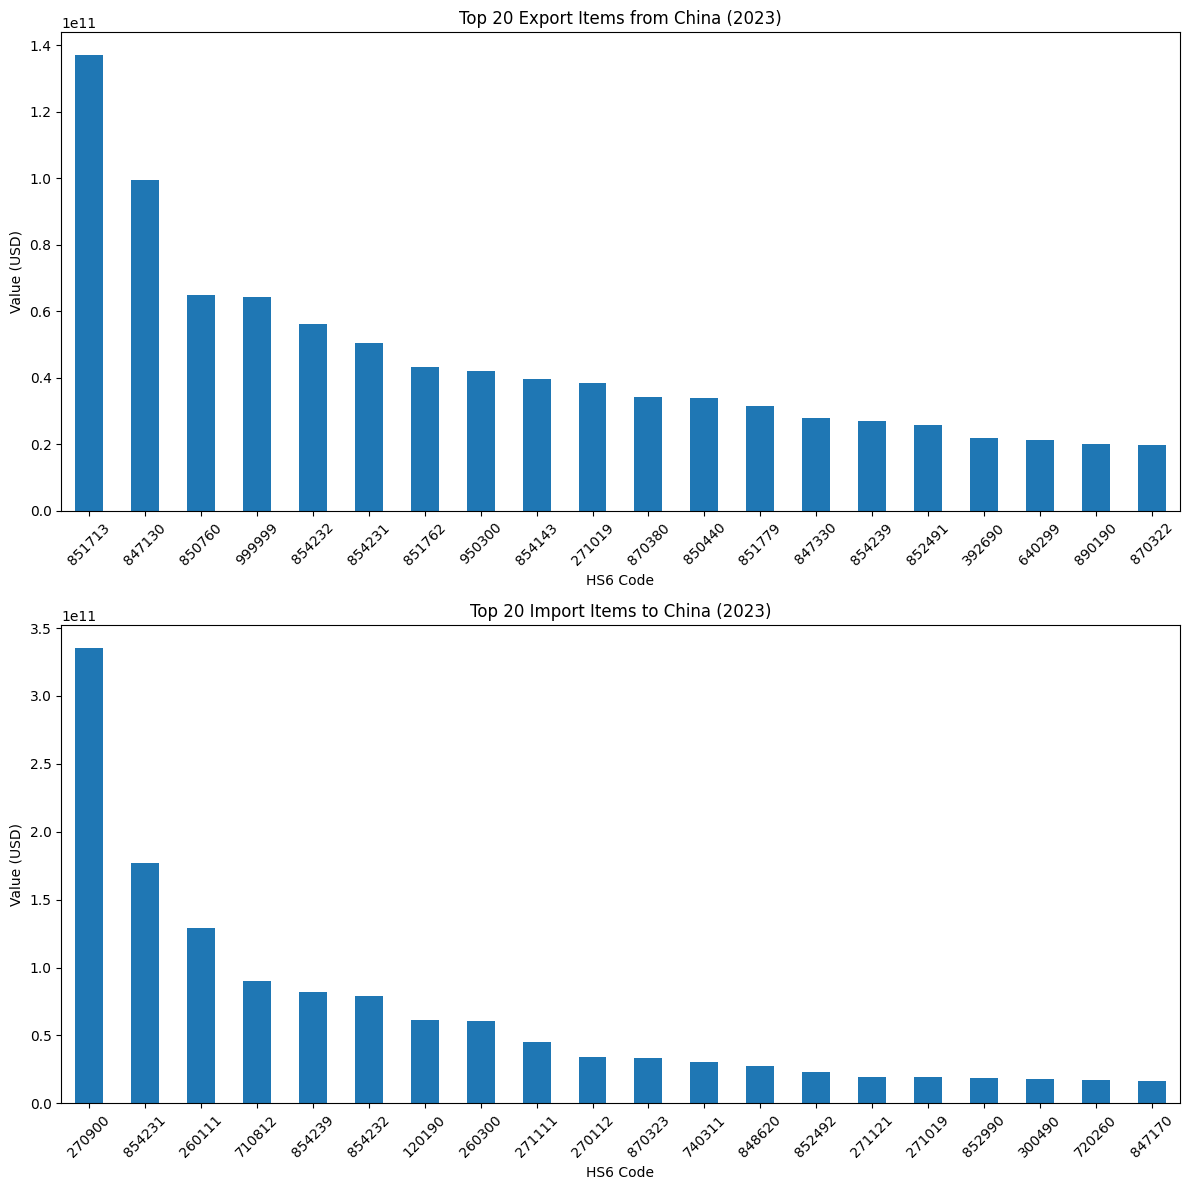

Top 20 Export Items:
hs6
851713    136961609860
847130     99430933394
850760     64882191031
999999     64355348737
854232     56175483442
854231     50491212619
851762     43320757901
950300     41941309998
854143     39595726665
271019     38504819236
870380     34125366183
850440     33973652168
851779     31481550329
847330     27790260447
854239     26875288967
852491     25689427440
392690     21898867026
640299     21325660567
890190     20014888011
870322     19706418810
Name: value, dtype: int64

Top 20 Import Items:
hs6
270900    335533503349
854231    177071039186
260111    129376090566
710812     90316492516
854239     82334732142
854232     79301060342
120190     61420702242
260300     60444325371
271111     45124572506
270112     34180318540
870323     33214977443
740311     30151062720
848620     27392948536
852492     23240209171
271121     19387872914
271019     19117477317
852990     18718391541
300490     17832872856
720260     17106262132
847170     16116227216
Nam

In [9]:
# Filter for 2023 data
df_chn_2023 = df_chn[df_chn['year'] == 2023]

# Get top 20 export items
top20_exports = (
    df_chn_2023[df_chn_2023['trade_flow'] == 'Exports']
    .groupby('hs6')['value']
    .sum()
    .sort_values(ascending=False)
    .head(20)
)

# Get top 20 import items
top20_imports = (
    df_chn_2023[df_chn_2023['trade_flow'] == 'Imports']
    .groupby('hs6')['value']
    .sum()
    .sort_values(ascending=False)
    .head(20)
)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot exports
top20_exports.plot(kind='bar', ax=ax1)
ax1.set_title('Top 20 Export Items from China (2023)')
ax1.set_xlabel('HS6 Code')
ax1.set_ylabel('Value (USD)')
ax1.tick_params(axis='x', rotation=45)

# Plot imports
top20_imports.plot(kind='bar', ax=ax2)
ax2.set_title('Top 20 Import Items to China (2023)')
ax2.set_xlabel('HS6 Code')
ax2.set_ylabel('Value (USD)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print the values
print("Top 20 Export Items:")
print(top20_exports)
print("\nTop 20 Import Items:")
print(top20_imports)

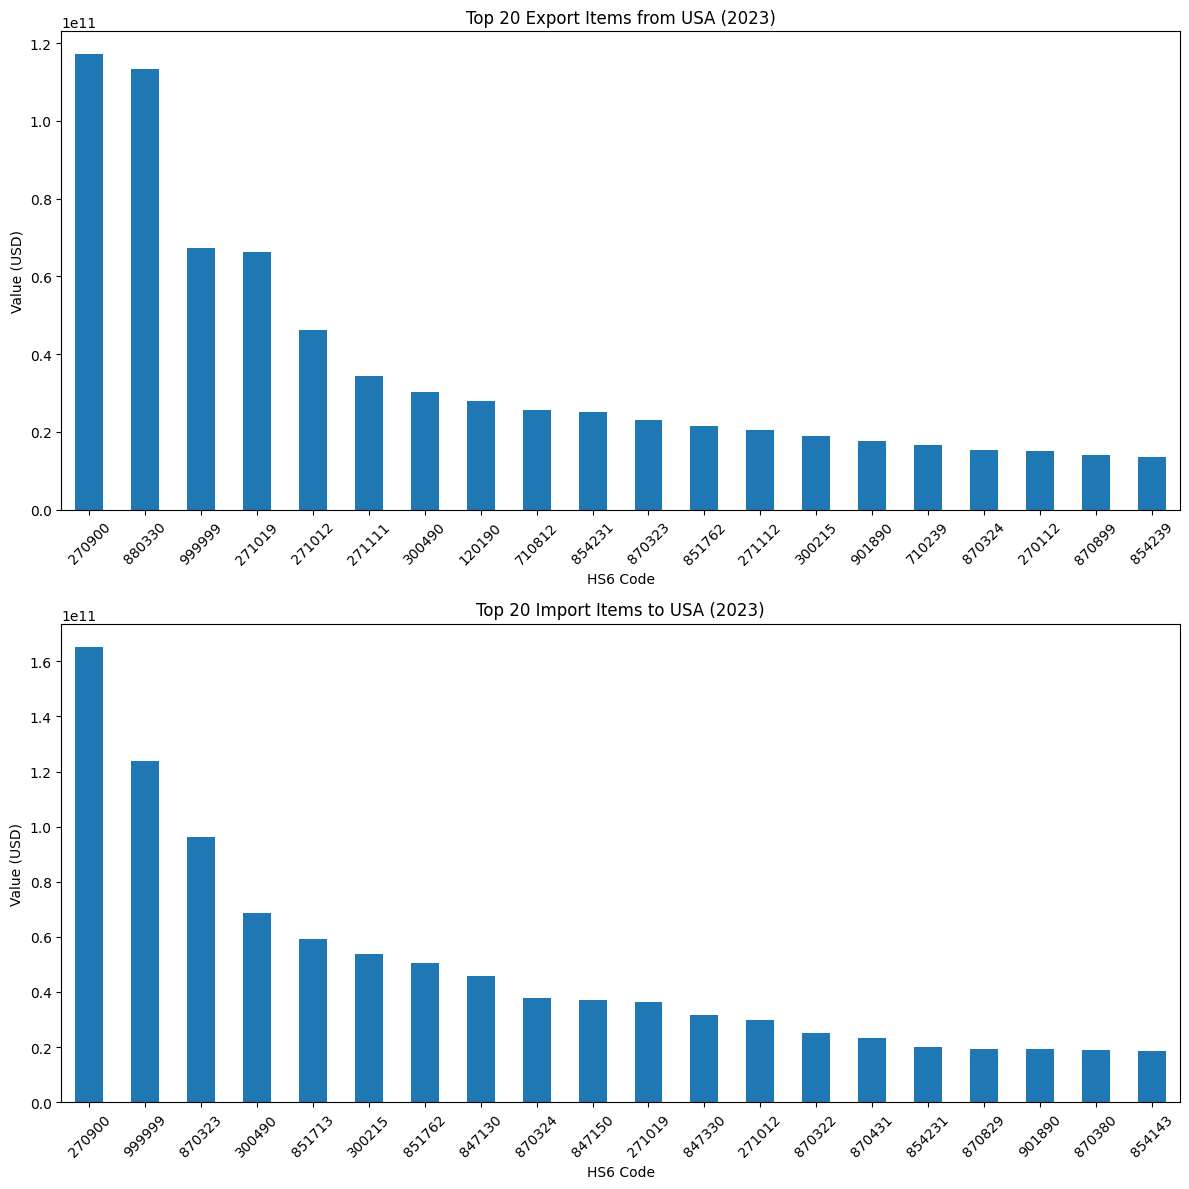

Top 20 Export Items:
hs6
270900    117160520564
880330    113317297960
999999     67359995437
271019     66379116366
271012     46150969046
271111     34267727567
300490     30204132600
120190     27943640358
710812     25658919895
854231     25077591913
870323     22940661244
851762     21522278889
271112     20591954690
300215     19042154400
901890     17678904755
710239     16652131319
870324     15229530481
270112     15035538555
870899     14006779855
854239     13634852661
Name: value, dtype: int64

Top 20 Import Items:
hs6
270900    165333122697
999999    123980510265
870323     96305417953
300490     68647563228
851713     59084592414
300215     53952097036
851762     50649311171
847130     45814875730
870324     37681734525
847150     36918293485
271019     36445635475
847330     31538793089
271012     29682662368
870322     25176635334
870431     23374820889
854231     20144486263
870829     19406936586
901890     19312453542
870380     18801697102
854143     18607789979
Nam

In [10]:
# Filter for 2023 data
df_usa_2023 = df_usa[df_usa['year'] == 2023]

# Get top 20 export items
top20_exports_usa = (
    df_usa_2023[df_usa_2023['trade_flow'] == 'Exports']
    .groupby('hs6')['value']
    .sum()
    .sort_values(ascending=False)
    .head(20)
)

# Get top 20 import items
top20_imports_usa = (
    df_usa_2023[df_usa_2023['trade_flow'] == 'Imports']
    .groupby('hs6')['value']
    .sum()
    .sort_values(ascending=False)
    .head(20)
)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot exports
top20_exports_usa.plot(kind='bar', ax=ax1)
ax1.set_title('Top 20 Export Items from USA (2023)')
ax1.set_xlabel('HS6 Code')
ax1.set_ylabel('Value (USD)')
ax1.tick_params(axis='x', rotation=45)

# Plot imports
top20_imports_usa.plot(kind='bar', ax=ax2)
ax2.set_title('Top 20 Import Items to USA (2023)')
ax2.set_xlabel('HS6 Code')
ax2.set_ylabel('Value (USD)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print the values
print("Top 20 Export Items:")
print(top20_exports_usa)
print("\nTop 20 Import Items:")
print(top20_imports_usa)

In [11]:
# Read the CSV file header to get column names
sample_chn_df = pd.read_csv("samples/sample_chn_2023.csv", nrows=0)
print("Columns in sample_chn_2023.csv:")
print(sample_chn_df.columns.tolist())

Columns in sample_chn_2023.csv:
['month_id', 'province_id', 'province_name', 'trade_flow_name', 'country_id', 'country_name', 'product_id', 'product_name', 'trade_value', 'trade_quantity', 'trade_supplimentary_quantity', 'unit_abbrevation', 'unit_name']


In [12]:
# Read the CSV file header to get column names
sample_usa_df = pd.read_csv("samples/sample_usa_2023.csv", nrows=0)
print("Columns in sample_usa_2023.csv:")
print(sample_usa_df.columns.tolist())

Columns in sample_usa_2023.csv:
['month_id', 'state_id', 'state_name', 'trade_flow_name', 'country_id', 'country_name', 'product_id', 'product_name', 'trade_value']


In [13]:
# Filter for 2024 USA-India trade data
df_usa_india_2024 = df_usa[
    (df_usa['year'] == 2024) & 
    ((df_usa['destination'] == 'IND') | 
     ((df_usa['trade_flow'] == 'Imports') & (df_usa['origin'] == 'USA') & (df_usa['destination'] == 'IND')))
]

# Get top 20 exports
top20_exports_india = (
    df_usa_india_2024[df_usa_india_2024['trade_flow'] == 'Exports']
    .groupby('hs6')['value']
    .sum()
    .sort_values(ascending=False)
    .head(20)
    / 1e9  # Convert to billions
)

# Get top 20 imports
top20_imports_india = (
    df_usa_india_2024[df_usa_india_2024['trade_flow'] == 'Imports']
    .groupby('hs6')['value']
    .sum()
    .sort_values(ascending=False)
    .head(20)
    / 1e9  # Convert to billions
)

print("Top 20 USA Exports to India in 2024 (USD Billions):")
print(top20_exports_india)
print("\nTop 20 USA Imports from India in 2024 (USD Billions):")
print(top20_imports_india)

Top 20 USA Exports to India in 2024 (USD Billions):
hs6
270900    6.481535
270112    3.152942
880330    2.859452
710239    2.479769
710812    1.986214
271111    1.360664
999999    0.931683
080211    0.915136
760200    0.725963
271019    0.671899
271311    0.666471
847150    0.646514
711319    0.530257
851762    0.492929
720449    0.432477
220710    0.363026
901890    0.308278
470710    0.301318
470321    0.228464
290110    0.226374
Name: value, dtype: float64

Top 20 USA Imports from India in 2024 (USD Billions):
hs6
300490    10.565693
851713     6.920061
710239     6.687228
711319     3.128519
271012     2.655245
851762     1.819085
030617     1.793213
854143     1.535124
999999     1.406076
710491     0.944910
630260     0.803970
630231     0.791301
850440     0.617862
848340     0.584324
870899     0.568748
681099     0.507068
730890     0.476683
300420     0.459983
870830     0.434458
841290     0.428793
Name: value, dtype: float64


In [14]:
# Filter for 2024 USA-India trade data at HS4 level
df_usa_india_2024_hs4 = df_usa[
    (df_usa['year'] == 2024) & 
    ((df_usa['destination'] == 'IND') | 
     ((df_usa['trade_flow'] == 'Imports') & (df_usa['origin'] == 'USA') & (df_usa['destination'] == 'IND')))
]

# Get top 20 exports at HS4 level
top20_exports_india_hs4 = (
    df_usa_india_2024_hs4[df_usa_india_2024_hs4['trade_flow'] == 'Exports']
    .groupby('hs4')['value']
    .sum()
    .sort_values(ascending=False)
    / 1e9  # Convert to billions
)

# Get top 20 imports at HS4 level
top20_imports_india_hs4 = (
    df_usa_india_2024_hs4[df_usa_india_2024_hs4['trade_flow'] == 'Imports']
    .groupby('hs4')['value']
    .sum()
    .sort_values(ascending=False)
    / 1e9  # Convert to billions
)

# Calculate others and total for exports
exports_others = top20_exports_india_hs4[20:].sum()
exports_total = top20_exports_india_hs4.sum()
top20_exports_india_hs4 = top20_exports_india_hs4.head(20)
top20_exports_india_hs4['Others'] = exports_others
top20_exports_india_hs4['Total'] = exports_total

# Calculate others and total for imports
imports_others = top20_imports_india_hs4[20:].sum()
imports_total = top20_imports_india_hs4.sum()
top20_imports_india_hs4 = top20_imports_india_hs4.head(20)
top20_imports_india_hs4['Others'] = imports_others
top20_imports_india_hs4['Total'] = imports_total

print("Top 20 USA Exports to India in 2024 by HS4 (USD Billions):")
print(top20_exports_india_hs4)
print("\nTop 20 USA Imports from India in 2024 by HS4 (USD Billions):")
print(top20_imports_india_hs4)

Top 20 USA Exports to India in 2024 by HS4 (USD Billions):
hs4
2709       6.481535
2701       3.172928
8803       2.859452
7102       2.487828
7108       2.045419
2711       1.402186
0802       1.116761
8471       0.994046
9999       0.931683
7204       0.796952
2710       0.733383
7602       0.725963
2713       0.675345
9018       0.620727
8517       0.570774
7113       0.547876
2207       0.441859
4707       0.417452
8708       0.408223
9027       0.309902
Others    14.012475
Total     41.752771
Name: value, dtype: float64

Top 20 USA Imports from India in 2024 by HS4 (USD Billions):
hs4
3004      11.993890
8517       8.861093
7102       6.688181
7113       3.487193
2710       3.003132
6302       2.108320
8708       1.981072
0306       1.802779
8541       1.617984
9999       1.406076
8483       1.138554
8504       1.006246
7104       0.952920
6204       0.911937
2933       0.676751
8481       0.651892
9403       0.613647
7308       0.601656
8412       0.564201
4011       0.517741
Oth

In [15]:
# Filter for 2024 China-India trade data
df_chn_india_2024 = df_chn[
    (df_chn['year'] == 2024) & 
    ((df_chn['destination'] == 'IND') | 
     ((df_chn['trade_flow'] == 'Imports') & (df_chn['origin'] == 'CHN') & (df_chn['destination'] == 'IND')))
]

# Get top 20 exports at HS4 level
top20_exports_india_chn = (
    df_chn_india_2024[df_chn_india_2024['trade_flow'] == 'Exports']
    .groupby('hs4')['value']
    .sum()
    .sort_values(ascending=False)
    / 1e9  # Convert to billions
)

# Get top 20 imports at HS4 level  
top20_imports_india_chn = (
    df_chn_india_2024[df_chn_india_2024['trade_flow'] == 'Imports']
    .groupby('hs4')['value']
    .sum()
    .sort_values(ascending=False)
    / 1e9  # Convert to billions
)

# Calculate others and total for exports
exports_others_chn = top20_exports_india_chn[20:].sum()
exports_total_chn = top20_exports_india_chn.sum()
top20_exports_india_chn = top20_exports_india_chn.head(20)
top20_exports_india_chn['Others'] = exports_others_chn
top20_exports_india_chn['Total'] = exports_total_chn

# Calculate others and total for imports
imports_others_chn = top20_imports_india_chn[20:].sum()
imports_total_chn = top20_imports_india_chn.sum()
top20_imports_india_chn = top20_imports_india_chn.head(20)
top20_imports_india_chn['Others'] = imports_others_chn
top20_imports_india_chn['Total'] = imports_total_chn

print("Top 20 China Exports to India in 2024 by HS4 (USD Billions):")
print(top20_exports_india_chn)
print("\nTop 20 China Imports from India in 2024 by HS4 (USD Billions):")
print(top20_imports_india_chn)

Top 20 China Exports to India in 2024 by HS4 (USD Billions):
hs4
8542        7.503559
8517        7.019111
8471        6.446225
8524        5.953849
8529        3.958626
8541        3.811290
8507        2.337423
8504        2.216542
2933        1.679388
8414        1.409538
8479        1.151041
2941        1.133802
8708        1.086640
3904        1.041444
9405        1.036161
8528        0.998740
2934        0.967882
8483        0.911023
8536        0.828904
3920        0.823863
Others     68.276427
Total     120.591476
Name: value, dtype: float64

Top 20 China Imports from India in 2024 by HS4 (USD Billions):
hs4
2601       3.546730
0306       0.809131
7102       0.744553
8517       0.653283
1515       0.525753
6703       0.491303
0904       0.467997
7601       0.403106
2516       0.397599
2501       0.390784
2710       0.367421
1508       0.337951
7403       0.317284
5205       0.305987
2933       0.305212
8408       0.299888
0303       0.270591
7202       0.257149
2902       0.1978